# Kings County Housing Prices Bake-off Analysis Noteook

Below I explain and go through the steps I took to come up with my model for predicting housing prices in King county, Washington. 

## Step 1: Importing Packages, Reading Data, Setting Up Initial Variable 

>In this step I import all of the packages I need thruout my process, read in my two sets, and sets list 

In [1]:
#import packages

import numpy as np
import seaborn as sns 
from geopy.distance import distance
import scipy.stats as stats
from scipy import stats 
from math import sqrt
import scipy
import pandas as pd
import sklearn 
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols 
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import linear_model 
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler 
import statsmodels.formula.api as smf
import statsmodels.api as sm 
import pickle

plt.style.use('seaborn')
sns.set(style='darkgrid', color_codes=True)

In [2]:
#Calls data sets

h = pd.read_csv('kc_house_data_train.csv') 
niche = pd.read_csv('Niche - Sheet1.csv') 

In [3]:
#Joins the two sets together

hnj = niche.set_index('zipcode').join(h.set_index('zipcode')) 
hnj = hnj.reset_index()
hnj = hnj.dropna(subset=['id'])

In [4]:
#Check the length of original data set
len(h.index)

17290

In [5]:
#Check the length of the new data set to confirm they match
len(hnj.index)

17290

In [6]:
#Separates the columns into two variables to make it easier to do charts 
numerical = ['population', 'price','sqft_living', 'sqft_lot','sqft_above', 
             'sqft_basement','sqft_living15', 'sqft_lot15']

categorical = ['zipcode','niche_grade', 'school_grade','bedrooms', 'bathrooms',
               'floors', 'waterfront', 'view', 'condition','grade','yr_built', 'yr_renovated']


## Step 2: Exploratory Data Analysis 
    
At the stage I explore all the data with visuals and dataframe outputs. 

In [7]:
#Returns the first 5 rows of the data set so that i ca
h.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [8]:
#Returns a summary of all columns so that I can 
h.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,...,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,...,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,...,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,...,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


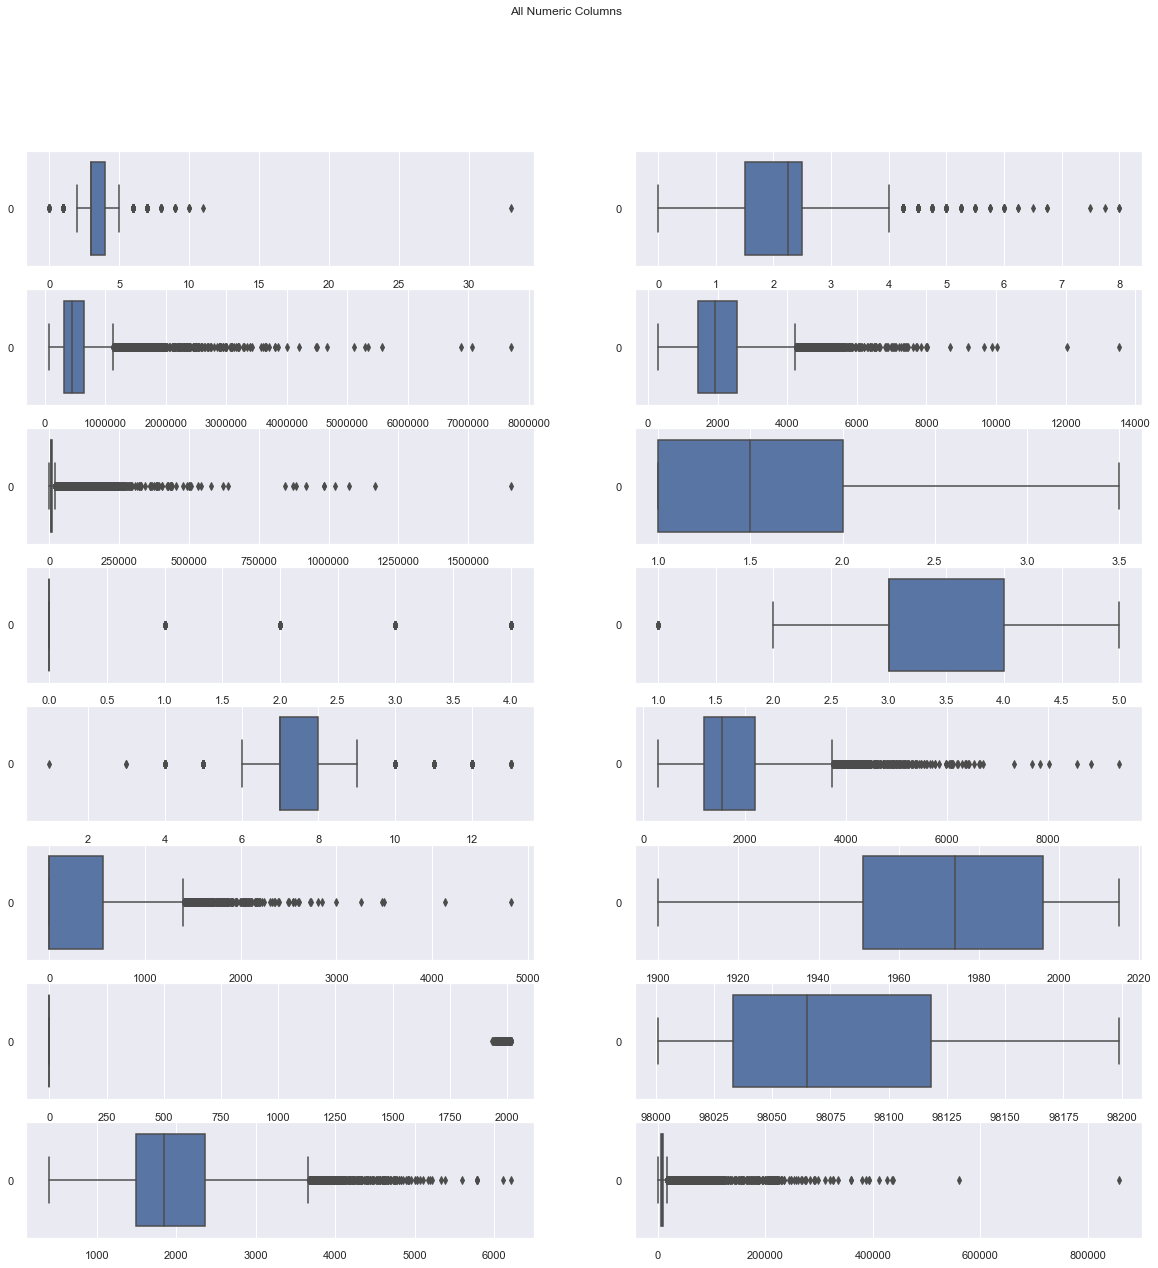

In [9]:
#Creats a boxplot of all the columns listed. 
fig, axes = plt.subplots(8,2, figsize=(20,20)) 
fig.suptitle('All Numeric Columns')

sns.boxplot(ax=axes[0, 0], data=h['bedrooms'], orient='h')
sns.boxplot(ax=axes[0, 1], data=h['bathrooms'], orient='h')

sns.boxplot(ax=axes[1, 0], data=h['price'], orient='h') 
sns.boxplot(ax=axes[1, 1], data=h['sqft_living'], orient='h') 

sns.boxplot(ax=axes[2, 0], data=h['sqft_lot'], orient='h')
sns.boxplot(ax=axes[2, 1], data=h['floors'], orient='h')

sns.boxplot(ax=axes[3, 0], data=h['view'], orient='h') 
sns.boxplot(ax=axes[3, 1], data=h['condition'], orient='h')  

sns.boxplot(ax=axes[4, 0], data=h['grade'], orient='h')
sns.boxplot(ax=axes[4, 1], data=h['sqft_above'], orient='h')

sns.boxplot(ax=axes[5, 0], data=h['sqft_basement'], orient='h') 
sns.boxplot(ax=axes[5, 1], data=h['yr_built'], orient='h') 

sns.boxplot(ax=axes[6, 0], data=h['yr_renovated'], orient='h')
sns.boxplot(ax=axes[6, 1], data=h['zipcode'], orient='h')

sns.boxplot(ax=axes[7, 0], data=h['sqft_living15'], orient='h') 
sns.boxplot(ax=axes[7, 1], data=h['sqft_lot15'], orient='h') 

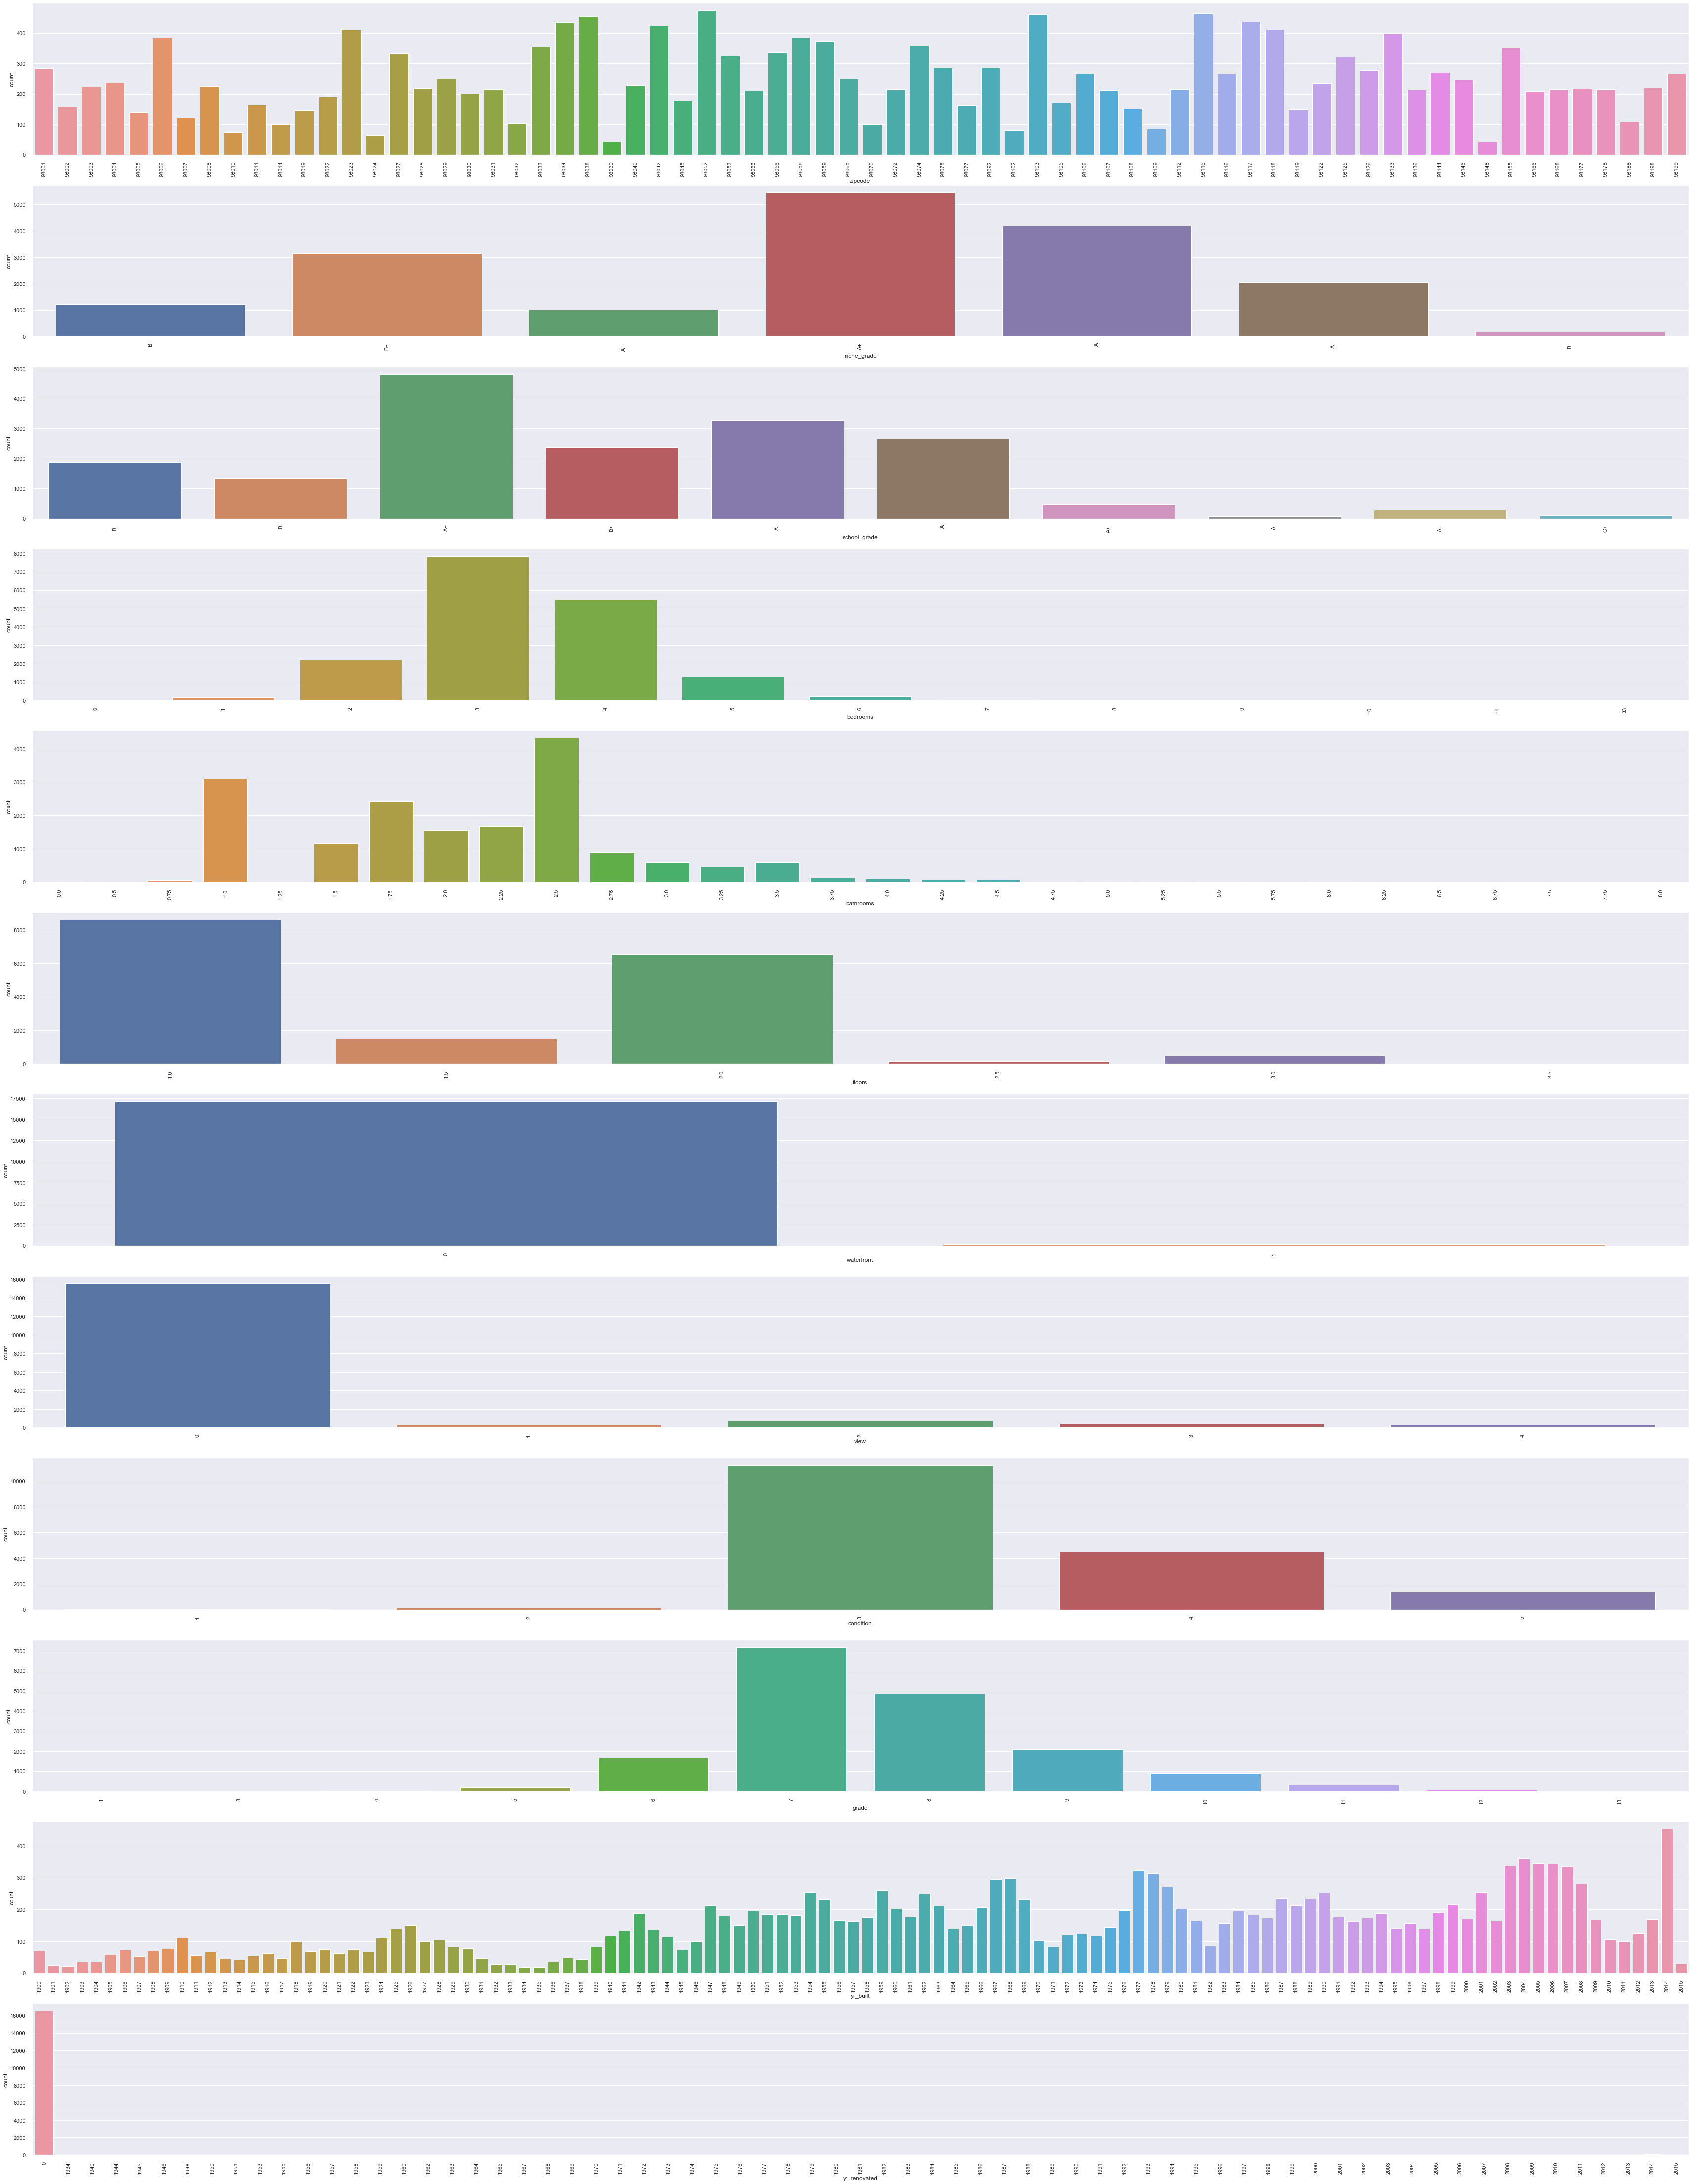

In [10]:
#Generates charts for all the catagorical columns
fig, ax = plt.subplots(12, 1, figsize=(60, 80))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(hnj[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

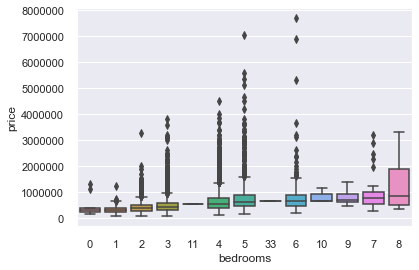

In [11]:
#The next few lines creat charts for some of the numerical variables
sorted_nb = h.groupby(['bedrooms'])['price'].median().sort_values()
sns.boxplot(x=h['bedrooms'], y=h['price'], order=list(sorted_nb.index))

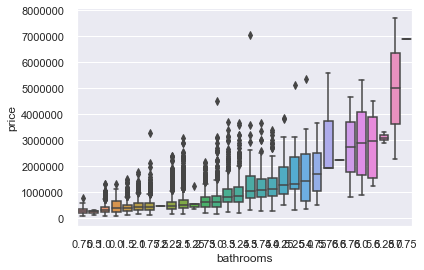

In [12]:
sorted_nb = h.groupby(['bathrooms'])['price'].median().sort_values()
sns.boxplot(x=h['bathrooms'], y=h['price'], order=list(sorted_nb.index))

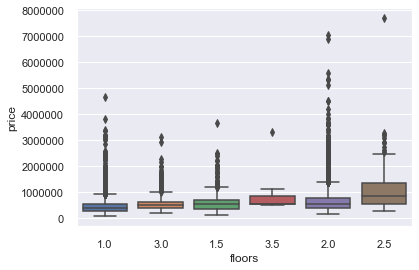

In [13]:
sorted_nb = h.groupby(['floors'])['price'].median().sort_values()
sns.boxplot(x=h['floors'], y=h['price'], order=list(sorted_nb.index))

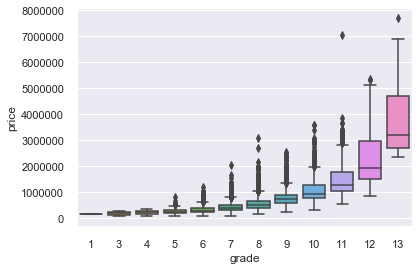

In [14]:
sorted_nb = h.groupby(['grade'])['price'].median().sort_values()
sns.boxplot(x=h['grade'], y=h['price'], order=list(sorted_nb.index))

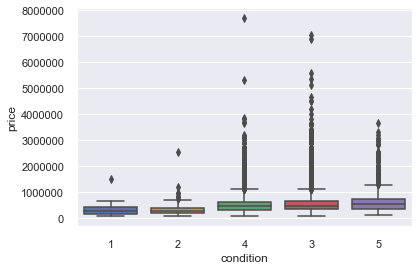

In [15]:
sorted_nb = h.groupby(['condition'])['price'].median().sort_values()
sns.boxplot(x=h['condition'], y=h['price'], order=list(sorted_nb.index))

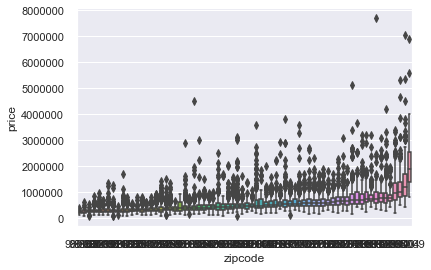

In [16]:
sorted_nb = h.groupby(['zipcode'])['price'].median().sort_values()
sns.boxplot(x=h['zipcode'], y=h['price'], order=list(sorted_nb.index))

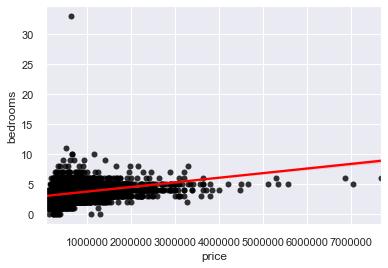

In [17]:
#Explores bedrooms against price in a way that better shows the spread of bedrooms.
sns.regplot(h['price'],h['bedrooms'], scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [18]:
#hHere
price_corr = hnj[hnj.columns[:]].corr()['price'][:] 
price_corr.sort_values()

zip_rank        -0.470936
population      -0.101279
zipcode         -0.048958
id              -0.015644
Unnamed: 0      -0.012306
long             0.019327
condition        0.036099
yr_built         0.056450
sqft_lot15       0.081423
sqft_lot         0.086803
yr_renovated     0.117770
floors           0.256985
waterfront       0.275779
lat              0.302394
bedrooms         0.305106
sqft_basement    0.323312
view             0.395485
bathrooms        0.524335
sqft_living15    0.585567
sqft_above       0.607760
grade            0.666215
sqft_living      0.703540
price            1.000000
Name: price, dtype: float64

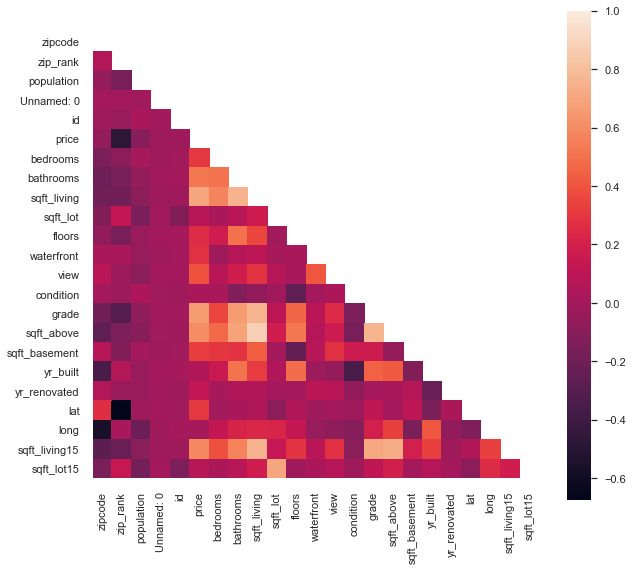

In [19]:
plt.style.use('seaborn')
sns.set(style="white") 


f, ax = plt.subplots(figsize=(10, 9))

mask = np.zeros_like(hnj.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(hnj.corr(), mask=mask, square=True)
b, t = plt.ylim() 
b += .5
t -= .5 
plt.ylim(b, t) 
plt.show() 

## Step 3: Clean up the data 

Having looked at the visuals, I have noted multiple columns that require capping for extreme, accounting for errors, and other such transformations.

In [20]:
#Creates variable list tranform thruout
prelim_feat = ['zipcode', 'niche_grade', 'school_grade', 'population', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition','grade', 'sqft_above', 
               'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long'] 

test_feat = ['zipcode', 'population', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition','grade', 'sqft_above', 
               'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long'] 


hnj1 = hnj[test_feat] 
target = 'price'

In [21]:
hnj2 = hnj.copy()

In [22]:
#Drops unneeded columns
def drop_uneeded_columns(df): 
    unwanted_columns_lists= ['zip_rank','Unnamed: 0', 'id', 'date',
                             'sqft_living15', 'sqft_lot15'] 
    for c in unwanted_columns_lists: 
        del df[c] 

In [23]:
drop_uneeded_columns(hnj2)

In [24]:
#Creates Test to check features
def model_test(df, features, target): 
    target = df[target]
    df_feature = df[features]
    X_train, X_test, y_train, y_test = train_test_split(df_feature, target, random_state=34,test_size=0.2)
    lm = linear_model.LinearRegression()
    lm = lm.fit(X_train, y_train)
    y_train_pred = lm.predict(X_train) 
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    y_pred = lm.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))     

In [25]:
model_test(hnj2, test_feat, target)

Training:  204671 vs. Testing:  205245


In [26]:
hnj3 = hnj2.copy()

In [27]:
#This function caps bedrooms and bathrooms 
def cap_ba_bd(row):
    if row['bedrooms'] > 11:
        row['bedrooms'] = 3 #column average
    if row['bedrooms'] > 9:
        row['bedrooms'] = 10
    if row['bathrooms'] < 1:
        row['bathrooms'] = 1
    return row 

In [28]:
hnj3.apply(cap_ba_bd, axis = 1) 

,zipcode,niche_grade,school_grade,population,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
0,98001,B,B-,32625,309000.0,5,2.75,2481,4045,2.0,0,0,3,8,2481,0,2014,0,47.2602,-122.284
1,98001,B,B-,32625,286651.0,3,2.50,1830,4997,2.0,0,0,3,7,1830,0,2004,0,47.3035,-122.283
2,98001,B,B-,32625,260000.0,5,2.25,2320,6375,1.0,0,0,4,7,1270,1050,1967,0,47.3351,-122.282
3,98001,B,B-,32625,165000.0,3,1.00,1150,19200,1.0,0,0,4,5,1150,0,1908,0,47.2756,-122.270
4,98001,B,B-,32625,185900.0,3,1.00,940,10890,1.0,0,0,4,5,940,0,1909,0,47.2763,-122.257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,98199,A,A-,21954,510000.0,2,1.00,810,6480,1.0,0,0,5,6,810,0,1942,0,47.6493,-122.398
17286,98199,A,A-,21954,1115000.0,4,2.50,3690,11191,1.0,0,3,4,10,2190,1500,1951,0,47.6434,-122.412
17287,98199,A,A-,21954,756000.0,3,2.50,3560,8297,1.0,0,2,4,8,1650,1910,1948,0,47.6473,-122.407
17288,98199,A,A-,21954,875000.0,2,2.50,2720,4913,1.0,0,1,4,8,1700,1020,1936,0,47.6384,-122.404


In [29]:
model_test(hnj3, test_feat, target)

Training:  204671 vs. Testing:  205245


In [30]:
clean_data = hnj3.copy()

## Step 4: Created new features.

At this stage I will create new features based off of what seems worth looking into from the visuals.

In [31]:
#Calculates the distance to a popular park in seattle and creates the column 
clean_data['distance_to_gas_works'] = np.nan
def dist_to_gas_work(row): 
    gas_works_park = (47.6456, -122.3344) 
    coord = (row['lat'], row['long']) 
    dist = distance(gas_works_park, coord).miles 
    row['distance_to_gas_works'] = (round((dist), 2))
    return row 

clean_data = clean_data.apply(dist_to_gas_work, axis = 1)

In [32]:
#Calculates the ratio of bedrooms to bathrooms
clean_data['bath_to_bed'] = np.nan
def b_b_column(row): 
    if row['bedrooms'] == 0: 
         bath_bed = row['bathrooms']/1
    else:
        bath_bed = row['bathrooms']/row['bedrooms'] 
    ratio_ab = abs(bath_bed) 
    row['bath_to_bed'] = ratio_ab 
    return row 
clean_data = clean_data.apply(b_b_column, axis = 1)

In [33]:
#Creates a binary column that denotes whether a home has the golden ratio (or is within 10% of it)
clean_data['golden_ratio'] = np.nan
def golden_ratio(row): 
    golden_ratio = 2/3
    golden_ratio_u = golden_ratio + (golden_ratio*.10) 
    golden_ratio_l = golden_ratio - (golden_ratio*.10) 
    if row['bath_to_bed'] >= golden_ratio_l:
        if row['bath_to_bed'] <= golden_ratio_u: 
            row['golden_ratio'] = 1  
        else: 
            row['golden_ratio'] = 0 
    else: 
        row['golden_ratio'] = 0 
    return row 

clean_data = clean_data.apply(golden_ratio, axis = 1)

In [34]:
#Creates a populates a sqft living to lot ration 
clean_data['sqft_li_to_sqft_lo'] = np.nan
def li_lo_column(row): 
    living__to_lot = row['sqft_living']/row['sqft_lot']
    ratio_ab = abs(living__to_lot) 
    row['sqft_li_to_sqft_lo'] = ratio_ab 
    return row  
clean_data = clean_data.apply(li_lo_column, axis = 1)

In [35]:
#Creates and populates a new row tha combine grade and condition while slightly weighing grade by 25%
clean_data['score'] = np.nan
def grade_n_cond(row): 
    new_grade = row['grade']*1.25
    score = new_grade + row['condition']
    row['score'] = score 
    return row 
clean_data = clean_data.apply(grade_n_cond, axis = 1)

In [36]:
#Creates and populates a new column that shows when the house was last changed whether it was when it was built or renovated
clean_data['year_updated'] = np.nan
def year_changed(row): 
    if row['yr_renovated'] > 1:
        row['year_updated'] = row['yr_renovated']  
    else: 
        row['year_updated'] = row['yr_built']
    return row 
clean_data = clean_data.apply(year_changed, axis = 1)

In [37]:
#Creates a binary based on whether or not a home has a basement by noting if it includes a number in higher zero in the sqft_basement column
clean_data['basement'] = clean_data['sqft_basement'].map(lambda x : 1 if x != 0 else 0) 

#Changes niche_grades from letters to numbers 
clean_data['niche_grade'] = clean_data['niche_grade'].replace(['A+','A+ ','A','A-','B+','B','B-'],[6,6,5,4,3,2,1])


#Changes school grades from letters to numbers
clean_data['school_grade'] = clean_data['school_grade'].replace(['A+','A+ ','A ','A','A-','A- ','B+','B','B-','C+'],[7,7,6,6,5,5,4,3,2,1])

In [38]:
#Catagorizes homes by number of bedrooms 
clean_data['home_category'] = np.nan
def home_cat(row): 
    if row['bedrooms'] < 2:
        row['home_category'] = 'starter'  
    elif row['bedrooms'] < 5: 
        row['home_category'] = 'small_family' 
    elif row['bedrooms'] < 9: 
        row['home_category'] = 'large_family'
    else:
        row['bedrooms'] >= 9
        row['home_category'] = 'mansion'
    return row 
clean_data = clean_data.apply(home_cat, axis = 1)

In [39]:
#Catagorizes home based on score 
clean_data['score_cat'] = np.nan
def score_cat(row): 
    if row['score'] <= 11.5:
        row['score_cat'] = 'low'  
    elif row['score'] <= 12: 
        row['score_cat'] = 'low_mid' 
    elif row['score'] <= 13: 
        row['score_cat'] = 'high_mid'
    else:
        row['score_cat'] = 'high_end'
    return row 
clean_data = clean_data.apply(score_cat, axis = 1)

In [40]:
#Calculates the last year updated from either year built or year renovated and populates it
clean_data['years_since_updated'] = np.nan
def years_old(row):  
    age = 2021 - row['year_updated'] 
    if age < 1: 
        row['years_since_updated'] = 1 
    else: 
        row['years_since_updated'] = age
    return row 
clean_data = clean_data.apply(years_old, axis = 1)

In [41]:
#Test the model once again 
test_feat = ['zipcode', 'population', 'bedrooms', 'bathrooms', 'years_since_updated',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition','grade', 'sqft_above', 
               'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long', 'distance_to_gas_works', 'bath_to_bed', 
            'golden_ratio', 'sqft_li_to_sqft_lo','score','year_updated','basement','niche_grade', 'school_grade'] 

model_test(clean_data, test_feat, target)

Training:  187651 vs. Testing:  191987


In [42]:
clean_data2 = clean_data.copy()

In [43]:
#drop columns that are no longer needed because new features have been created
def drop_uneeded_columns2(df): 
    unwanted_columns_lists= ['condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
        'long', 'lat'] 
    for c in unwanted_columns_lists: 
        del df[c]  
drop_uneeded_columns2(clean_data2)        

### 4.1) Dummy features 
Having created simple features I will now start more complex features with dummy variables.

In [44]:
#creates a copy of the dataset to work from 
pf_data = clean_data2.copy()

In [45]:
test_feat = ['zipcode', 'population', 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 
             'view','distance_to_gas_works', 'bath_to_bed', 'years_since_updated',
            'golden_ratio', 'sqft_li_to_sqft_lo','score','year_updated','basement','niche_grade', 'school_grade'] 

model_test(pf_data, test_feat, target)

Training:  192240 vs. Testing:  196497


In [46]:
#Turns out home category into dummy variables and drops the original column
pf_data = pd.concat([pf_data, pd.get_dummies(pf_data['home_category'])], 1) 
pf_data = pf_data.drop(columns = 'home_category') 

#Turns our score categories into dummy variables and drops the original column
pf_data = pd.concat([pf_data, pd.get_dummies(pf_data['score_cat'])], 1)   
pf_data = pf_data.drop(columns = 'score_cat') 

#Turns zipcodes into dummy variables and drops original columns
pf_data = pd.concat([pf_data, pd.get_dummies(pf_data['zipcode'])], 1)  
pf_data = pf_data.drop(columns = 'zipcode')

In [47]:
test_feat=  ['niche_grade','school_grade', 'years_since_updated',
                  'population',                 
                    'bedrooms',             'bathrooms',
                 'sqft_living',              'sqft_lot',
                      'floors',            'waterfront',
                        'view', 'distance_to_gas_works',
                 'bath_to_bed',          'golden_ratio',
          'sqft_li_to_sqft_lo',                 'score',
                'year_updated',              'basement',
                'large_family',               'mansion',
                'small_family',               'starter',
                    'high_end',              'high_mid',
                         'low',               'low_mid',
                       98001.0,                 98002.0,
                       98003.0,                 98004.0,
                       98005.0,                 98006.0,
                       98007.0,                 98008.0,
                       98010.0,                 98011.0,
                       98014.0,                 98019.0,
                       98022.0,                 98023.0,
                       98024.0,                 98027.0,
                       98028.0,                 98029.0,
                       98030.0,                 98031.0,
                       98032.0,                 98033.0,
                       98034.0,                 98038.0,
                       98039.0,                 98040.0,
                       98042.0,                 98045.0,
                       98052.0,                 98053.0,
                       98055.0,                 98056.0,
                       98058.0,                 98059.0,
                       98065.0,                 98070.0,
                       98072.0,                 98074.0,
                       98075.0,                 98077.0,
                       98092.0,                 98102.0,
                       98103.0,                 98105.0,
                       98106.0,                 98107.0,
                       98108.0,                 98109.0,
                       98112.0,                 98115.0,
                       98116.0,                 98117.0,
                       98118.0,                 98119.0,
                       98122.0,                 98125.0,
                       98126.0,                 98133.0,
                       98136.0,                 98144.0,
                       98146.0,                 98148.0,
                       98155.0,                 98166.0,
                       98168.0,                 98177.0,
                       98178.0,                 98188.0,
                       98198.0,                 98199.0] 



model_test(pf_data, test_feat, target)

Training:  158240 vs. Testing:  159919


### 4.2) Non linear variable 
I now move on to non- linear creations.

In [48]:
pf_data2 = pf_data.copy()

In [49]:
#Creates polynomial features 
pf_data2['niche_grade^2'] = pf_data2['niche_grade'] * pf_data2['niche_grade'] 
pf_data2['niche_grade_sqft_li_to_sqft_lo'] = pf_data2['sqft_li_to_sqft_lo'] * pf_data2['niche_grade'] 
pf_data2['niche_grade_score'] = pf_data2['score'] * pf_data2['niche_grade'] 
pf_data2['sqft_li_to_sqft_lo_score'] = pf_data2['score'] * pf_data2['sqft_li_to_sqft_lo'] 
pf_data2['score^2'] = pf_data2['score'] * pf_data2['score'] 
pf_data2['school_grade^2'] = pf_data2['school_grade'] * pf_data2['school_grade'] 
pf_data2['school_grade_niche_grade'] = pf_data2['school_grade'] * pf_data2['niche_grade'] 
pf_data2['school_grade_score'] = pf_data2['school_grade'] * pf_data2['score']  
pf_data2['school_grade_sqft_li_to_sqft_lo'] = pf_data2['school_grade'] * pf_data2['sqft_li_to_sqft_lo'] 

In [50]:
column_test = ['niche_grade','school_grade', 'years_since_updated',
                  'population',                 
                    'bedrooms',             'bathrooms',
                 'sqft_living',              'sqft_lot',
                      'floors',            'waterfront',
                        'view', 'distance_to_gas_works',
                 'bath_to_bed',          'golden_ratio',
          'sqft_li_to_sqft_lo',                 'score',
                'year_updated',              'basement',
                'large_family',               'mansion',
                'small_family',               'starter',
                    'high_end',              'high_mid',
                         'low',               'low_mid',
                       98001.0,                 98002.0,
                       98003.0,                 98004.0,
                       98005.0,                 98006.0,
                       98007.0,                 98008.0,
                       98010.0,                 98011.0,
                       98014.0,                 98019.0,
                       98022.0,                 98023.0,
                       98024.0,                 98027.0,
                       98028.0,                 98029.0,
                       98030.0,                 98031.0,
                       98032.0,                 98033.0,
                       98034.0,                 98038.0,
                       98039.0,                 98040.0,
                       98042.0,                 98045.0,
                       98052.0,                 98053.0,
                       98055.0,                 98056.0,
                       98058.0,                 98059.0,
                       98065.0,                 98070.0,
                       98072.0,                 98074.0,
                       98075.0,                 98077.0,
                       98092.0,                 98102.0,
                       98103.0,                 98105.0,
                       98106.0,                 98107.0,
                       98108.0,                 98109.0,
                       98112.0,                 98115.0,
                       98116.0,                 98117.0,
                       98118.0,                 98119.0,
                       98122.0,                 98125.0,
                       98126.0,                 98133.0,
                       98136.0,                 98144.0,
                       98146.0,                 98148.0,
                       98155.0,                 98166.0,
                       98168.0,                 98177.0,
                       98178.0,                 98188.0,
                       98198.0,                 98199.0, 'niche_grade^2',
        'niche_grade_sqft_li_to_sqft_lo',               'niche_grade_score',
              'sqft_li_to_sqft_lo_score',                         'score^2',
                        'school_grade^2',        'school_grade_niche_grade',
                    'school_grade_score', 'school_grade_sqft_li_to_sqft_lo'] 

model_test(pf_data2, column_test, 'price') 

Training:  150536 vs. Testing:  148511


In [51]:
pf_data3 = pf_data2.copy()

### 4.3) Creating interactions 
Becuase these will affect my split testing I will handle these separely here

In [52]:
all_feats = pf_data3.copy()

In [53]:
#Creates interaction between sqft_living and basement binary value

all_feats['s_b_b'] = all_feats['basement'] * all_feats['sqft_living'] 

#Creates interaction between waterfront and sqft_living

all_feats['w_b_s'] = all_feats['waterfront'] * all_feats['sqft_living']

In [54]:
feat_test = ['niche_grade','school_grade', 'years_since_updated', 's_b_b','w_b_s',
                  'population',                 
                    'bedrooms',             'bathrooms',
                 'sqft_living',              'sqft_lot',
                      'floors',            'waterfront',
                        'view', 'distance_to_gas_works',
                 'bath_to_bed',          'golden_ratio',
          'sqft_li_to_sqft_lo',                 'score',
                'year_updated',              'basement',
                'large_family',               'mansion',
                'small_family',               'starter',
                    'high_end',              'high_mid',
                         'low',               'low_mid',
                       98001.0,                 98002.0,
                       98003.0,                 98004.0,
                       98005.0,                 98006.0,
                       98007.0,                 98008.0,
                       98010.0,                 98011.0,
                       98014.0,                 98019.0,
                       98022.0,                 98023.0,
                       98024.0,                 98027.0,
                       98028.0,                 98029.0,
                       98030.0,                 98031.0,
                       98032.0,                 98033.0,
                       98034.0,                 98038.0,
                       98039.0,                 98040.0,
                       98042.0,                 98045.0,
                       98052.0,                 98053.0,
                       98055.0,                 98056.0,
                       98058.0,                 98059.0,
                       98065.0,                 98070.0,
                       98072.0,                 98074.0,
                       98075.0,                 98077.0,
                       98092.0,                 98102.0,
                       98103.0,                 98105.0,
                       98106.0,                 98107.0,
                       98108.0,                 98109.0,
                       98112.0,                 98115.0,
                       98116.0,                 98117.0,
                       98118.0,                 98119.0,
                       98122.0,                 98125.0,
                       98126.0,                 98133.0,
                       98136.0,                 98144.0,
                       98146.0,                 98148.0,
                       98155.0,                 98166.0,
                       98168.0,                 98177.0,
                       98178.0,                 98188.0,
                       98198.0,                 98199.0, 'niche_grade^2',
        'niche_grade_sqft_li_to_sqft_lo',               'niche_grade_score',
              'sqft_li_to_sqft_lo_score',                         'score^2',
                        'school_grade^2',        'school_grade_niche_grade',
                    'school_grade_score', 'school_grade_sqft_li_to_sqft_lo'] 
 

model_test(all_feats, feat_test, target)  

Training:  143939 vs. Testing:  143288


## Step 5: Train-Test Splitting

Now that I have all the features I want to test I am ready to begin testing.

In [55]:
#First I will create my list of non scaled features

# af_list = ['niche_grade','school_grade', 'years_since_updated', 's_b_b','w_b_s', 'population','bedrooms',
#            'bathrooms','sqft_living','sqft_lot', 'floors','waterfront','view', 'distance_to_gas_works',
#            'bath_to_bed','golden_ratio','sqft_li_to_sqft_lo','score','year_updated','basement','large_family',               'mansion',
#             'small_family','starter', 'high_end','high_mid','low','low_mid','niche_grade^2',
#            'niche_grade_sqft_li_to_sqft_lo','niche_grade_score','sqft_li_to_sqft_lo_score','score^2',
#             'school_grade^2', 'school_grade_niche_grade','school_grade_score', 'school_grade_sqft_li_to_sqft_lo',
#                        98001.0,                 98002.0,
#                        98003.0,                 98004.0,
#                        98005.0,                 98006.0,
#                        98007.0,                 98008.0,
#                        98010.0,                 98011.0,
#                        98014.0,                 98019.0,
#                        98022.0,                 98023.0,
#                        98024.0,                 98027.0,
#                        98028.0,                 98029.0,
#                        98030.0,                 98031.0,
#                        98032.0,                 98033.0,
#                        98034.0,                 98038.0,
#                        98039.0,                 98040.0,
#                        98042.0,                 98045.0,
#                        98052.0,                 98053.0,
#                        98055.0,                 98056.0,
#                        98058.0,                 98059.0,
#                        98065.0,                 98070.0,
#                        98072.0,                 98074.0,
#                        98075.0,                 98077.0,
#                        98092.0,                 98102.0,
#                        98103.0,                 98105.0,
#                        98106.0,                 98107.0,
#                        98108.0,                 98109.0,
#                        98112.0,                 98115.0,
#                        98116.0,                 98117.0,
#                        98118.0,                 98119.0,
#                        98122.0,                 98125.0,
#                        98126.0,                 98133.0,
#                        98136.0,                 98144.0,
#                        98146.0,                 98148.0,
#                        98155.0,                 98166.0,
#                        98168.0,                 98177.0,
#                        98178.0,                 98188.0,
#                        98198.0,                 98199.0,]  

# s_feats = ['niche_grade','school_grade', 'years_since_updated','population','sqft_living','sqft_lot',
#            'distance_to_gas_works','bath_to_bed','sqft_li_to_sqft_lo','score', 'niche_grade^2', 
#            'niche_grade_sqft_li_to_sqft_lo','niche_grade_score','sqft_li_to_sqft_lo_score','score^2',
#              'school_grade^2','school_grade_niche_grade', 'school_grade_score','school_grade_sqft_li_to_sqft_lo'] 



target = all_feats['price']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(all_feats, target, random_state=3,test_size=0.2)

In [61]:
# run_q_five(all_feats, af_list, s_feats, target)

In [62]:
#set scaler
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(x_train[s_feats])

#transform the training data
scaled_data = scaler.transform(x_train[s_feats])

In [63]:
#create dataframe
x_train_scaled = pd.DataFrame(data=scaled_data, columns=s_feats,index=x_train.index) 

In [64]:
not_scaled = [x for x in af_list if x not in s_feats] 

In [65]:
x_train = pd.concat([x_train_scaled, x_train[not_scaled]], axis=1)

In [66]:
#transform the training data
scaled_data = scaler.transform(x_test[s_feats])

#create dataframe
x_test_scaled = pd.DataFrame(data=scaled_data, columns=s_feats, index=x_test.index)


In [67]:
x_test = pd.concat([x_test_scaled, x_test[not_scaled]], axis=1)

In [68]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(x_train, y_train)


print(lm.intercept_)
print(lm.coef_)

278858495357.859
[ 2.33491612e+08  1.31514953e+05  6.55019685e+03 -9.08535152e+04
 -1.59884729e+04  2.07831795e+14 -3.80199680e+05  2.05663487e+05
  4.76435374e+05 -2.07831795e+14  3.05468750e+01  3.08125000e+02
 -2.07422500e+04  4.88349219e+04 -8.82991406e+03 -3.28022740e+05
  4.84219805e+04 -1.45094434e+04  8.11354659e+06 -9.39080850e+04
  2.14433572e+11  2.14433454e+11  2.14433576e+11  2.14433569e+11
 -5.03441839e+11 -5.03441766e+11 -5.03441710e+11 -5.03441726e+11
 -5.85870045e+09 -5.85867767e+09 -5.85871568e+09 -5.85813197e+09
 -5.85857329e+09 -5.85858909e+09 -5.85860929e+09 -5.85860030e+09
 -5.85859289e+09 -5.85871319e+09 -5.85861921e+09 -5.85866746e+09
 -5.85858348e+09 -5.85872894e+09 -5.85859696e+09 -5.85860287e+09
 -5.85873541e+09 -5.85855335e+09 -5.85873104e+09 -5.85875158e+09
 -5.85874224e+09 -5.85853251e+09 -5.85868160e+09 -5.85865918e+09
 -5.85749838e+09 -5.85841100e+09 -5.85870628e+09 -5.85854642e+09
 -5.85859869e+09 -5.85857488e+09 -5.85875417e+09 -5.85873853e+09
 -5.8587

In [69]:
y_train_pred = lm.predict(x_train)

y_test_pred = lm.predict(x_test)

In [70]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 144217.99986514216
Testing Root Mean Squared Error: 154327.28780374152


In [71]:
print('Perfomance : {} %'.format(round(abs((test_rmse-train_rmse)/train_rmse)*100)))

Perfomance : 7 %


## Step 6: Feature selection 
Now that I am satisfied with my split testing I will move on to feacture selection starting with performing a couple of hypothesis test on my simpler featueres.

In [72]:
#Hypothesis testing basement column 

has_base = all_feats[(all_feats['basement'] == 1)] 
base_price = has_base.price
no_base = all_feats[(all_feats['basement'] == 0)]   
nob_price = no_base.price

scipy.stats.ttest_ind(base_price,nob_price) 

Ttest_indResult(statistic=23.641892563316105, pvalue=1.2107663322174255e-121)

In [73]:
print('Based off of this test statistic, I would reject the null hypothesis.')

Based off of this test statistic, I would reject the null hypothesis.


In [74]:
#Hypothesis testing golden ratio column 

has_gr = all_feats[(all_feats['golden_ratio'] == 1)] 
gr_price = has_gr.price
has_gr = all_feats[(all_feats['golden_ratio'] == 0)]   
nogr_price = has_gr.price

scipy.stats.ttest_ind(gr_price,nogr_price) 


Ttest_indResult(statistic=10.653779530256454, pvalue=2.0220641399300563e-26)

In [75]:
print('Based off of this test statistic, I would reject the null hypothesis.')

Based off of this test statistic, I would reject the null hypothesis.


In [76]:
#Hypothesis testing waterfront column 

is_waterfront = all_feats[(all_feats['waterfront'] == 1)] 
waterfront_price = is_waterfront.price
no_waterfront = all_feats[(all_feats['waterfront'] == 0)]   
notw_price = no_waterfront.price

scipy.stats.ttest_ind(waterfront_price,notw_price) 


Ttest_indResult(statistic=37.723304295496085, pvalue=2.4650383176537387e-299)

In [77]:
print('Based off of this test statistic, I would reject the null hypothesis.')

Based off of this test statistic, I would reject the null hypothesis.


In [78]:
#Anova test on the home category makes a difference
alpha = 0.05 
formula = 'price~home_category'
lm_condition = smf.ols(formula, clean_data2).fit()
anova_condition = sm.stats.anova_lm(lm_condition, typ=2)
if anova_condition["PR(>F)"][0] < alpha:
    print("The home category has a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

The home category has a statistically significant impact on average property value
Conditions F-statisic Probability:  5.969633290958834e-192


In [79]:
formula = 'price~score_cat'
lm_condition = smf.ols(formula, clean_data2).fit()
anova_condition = sm.stats.anova_lm(lm_condition, typ=2)
if anova_condition["PR(>F)"][0] < alpha:
    print("The score category has a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

The score category has a statistically significant impact on average property value
Conditions F-statisic Probability:  0.0


### 6.1) Correlation Testing

In [80]:
price_corr = all_feats[all_feats.columns[:]].corr()['price'][:] 
price_corr

niche_grade                        0.457275
school_grade                       0.408324
population                        -0.101279
price                              1.000000
bedrooms                           0.305106
                                     ...   
school_grade_niche_grade           0.461843
school_grade_score                 0.574328
school_grade_sqft_li_to_sqft_lo    0.220854
s_b_b                              0.413924
w_b_s                              0.354563
Name: price, Length: 108, dtype: float64

In [81]:
print ("R^2 Score:", lm.score(x_train, y_train))

R^2 Score: 0.8496359529786228


In [82]:
c = x_train.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

so[1360:1420]

98136.0       98010.0         0.007628
98010.0       98136.0         0.007628
98040.0       98102.0         0.007642
98102.0       98040.0         0.007642
98034.0       98039.0         0.007643
98039.0       98034.0         0.007643
98105.0       bathrooms       0.007650
bathrooms     98105.0         0.007650
low           98022.0         0.007668
98022.0       low             0.007668
98168.0       small_family    0.007668
small_family  98168.0         0.007668
98109.0       98112.0         0.007672
98112.0       98109.0         0.007672
98014.0       98045.0         0.007677
98045.0       98014.0         0.007677
98014.0       98022.0         0.007677
98022.0       98014.0         0.007677
98119.0       98032.0         0.007697
98032.0       98119.0         0.007697
98106.0       98024.0         0.007698
98024.0       98106.0         0.007698
98133.0       98148.0         0.007700
98148.0       98133.0         0.007700
98010.0       98177.0         0.007718
98177.0       98010.0    

### 6.1)Perform F-Test

In [83]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=30)

selector.fit(x_train, y_train)

SelectKBest(k=30, score_func=<function f_regression at 0x7fbd5e789bf8>)

In [84]:
selector.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [85]:
selected_columns = x_train.columns[selector.get_support()]
removed_columns = x_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [86]:
#'sqft_li_to_sqft_lo', 'sqft_lot',

In [87]:
sugg =list(removed_columns)

In [88]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(x_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(x_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(x_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 162028.78529142175
Testing Root Mean Squared Error: 169639.93487326617


In [89]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  154327.28780374152 
 KBest:    169639.93487326617 



### 6.1)Perform Wrapper Test

In [90]:
from sklearn.feature_selection import RFECV

In [91]:
ols = linear_model.LinearRegression()

In [92]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(x_train, y_train)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=2, verbose=1)

In [93]:
selected_rfe = x_train.columns[selector.support_]
removed_rfe = x_train.columns[~selector.support_]

In [94]:
removed_rfe

Index([], dtype='object')

In [95]:
selected_rfe

Index([     'years_since_updated',              'sqft_living',
                       'sqft_lot',    'distance_to_gas_works',
                    'bath_to_bed',       'sqft_li_to_sqft_lo',
                          'score', 'sqft_li_to_sqft_lo_score',
                        'score^2',       'sqft_li_to_sqft_lo',
                          's_b_b',                    'w_b_s',
                       'bedrooms',                'bathrooms',
                         'floors',               'waterfront',
                           'view',             'golden_ratio',
                   'year_updated',                 'basement',
                   'large_family',                  'mansion',
                   'small_family',                  'starter',
                       'high_end',                 'high_mid',
                            'low',                  'low_mid',
                          98001.0,                    98002.0,
                          98003.0,                    9

In [96]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(x_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(x_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(x_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)

Training Root Mean Squared Error: 144217.99307340564
Testing Root Mean Squared Error: 154327.7545042065


In [97]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

Original:  154327.28780374152 
 KBest:    169639.93487326617 
 RFE:      154327.7545042065


## Step 7: Adjusting and choosing a model. 

So now that I have tested it seems all my variables are useful. Nevertheless I will be removing the duplicates cause by my poly features and re running my test. For the sake of ease I will do this by temporarily call altered set by the same name as the one I previously tested.

In [98]:
af_list = ['years_since_updated', 's_b_b','w_b_s', 'bedrooms',
           'bathrooms','sqft_living','sqft_lot', 'floors','waterfront','view', 'distance_to_gas_works',
           'bath_to_bed','golden_ratio','sqft_li_to_sqft_lo','score','year_updated','basement','large_family',    
           'mansion', 'small_family','starter', 'high_end','high_mid','low','low_mid',
           'sqft_li_to_sqft_lo_score','score^2',
                       98001.0,                 98002.0,
                       98003.0,                 98004.0,
                       98005.0,                 98006.0,
                       98007.0,                 98008.0,
                       98010.0,                 98011.0,
                       98014.0,                 98019.0,
                       98022.0,                 98023.0,
                       98024.0,                 98027.0,
                       98028.0,                 98029.0,
                       98030.0,                 98031.0,
                       98032.0,                 98033.0,
                       98034.0,                 98038.0,
                       98039.0,                 98040.0,
                       98042.0,                 98045.0,
                       98052.0,                 98053.0,
                       98055.0,                 98056.0,
                       98058.0,                 98059.0,
                       98065.0,                 98070.0,
                       98072.0,                 98074.0,
                       98075.0,                 98077.0,
                       98092.0,                 98102.0,
                       98103.0,                 98105.0,
                       98106.0,                 98107.0,
                       98108.0,                 98109.0,
                       98112.0,                 98115.0,
                       98116.0,                 98117.0,
                       98118.0,                 98119.0,
                       98122.0,                 98125.0,
                       98126.0,                 98133.0,
                       98136.0,                 98144.0,
                       98146.0,                 98148.0,
                       98155.0,                 98166.0,
                       98168.0,                 98177.0,
                       98178.0,                 98188.0,
                       98198.0,                 98199.0,]  

s_feats = [ 'years_since_updated','sqft_living','sqft_lot', 'distance_to_gas_works','bath_to_bed','sqft_li_to_sqft_lo','score', 
           'sqft_li_to_sqft_lo_score','score^2',
             'sqft_li_to_sqft_lo'] 


## Step 8:  Refit your best model to the entire dataset.

In [99]:
scaler1 = StandardScaler()
scaler1.fit(altered_list[ad_s_feats])
scaled_data2 = scaler1.transform(altered_list[ad_s_feats]) 

NameError: name 'altered_list' is not defined

In [100]:
df_features_scaled = pd.DataFrame(data=scaled_data2, columns=ad_s_feats, index=altered_list.index)

NameError: name 'scaled_data2' is not defined

In [ ]:
not_scaled = [x for x in ad_list if x not in ad_s_feats] 

In [ ]:
df_features = pd.concat([df_features_scaled, altered_list[not_scaled]], axis=1)

In [ ]:
df_features

In [ ]:
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(df_features, target)

In [ ]:
not_scaled = [x for x in ad_list if x not in ad_s_feats] 
not_scaled

In [ ]:
altered_list = all_feats[ad_list]

In [ ]:
lm.coef_

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [ ]:
def scale_fit_pickle_origin(df_features, target):
    """
    Scaling df with features,
    Fit linear model with scaled features
    Create pickle file with Scaler and Model
    params: 
            df_features - most important features 
            target - Series
    """
    scaler = StandardScaler()
    # fit the scaler to the training data
    scaler.fit(df_features)
    #transform the training data
    scaled_data = scaler.transform(df_features)
    #create dataframe
    df_features_scaled = pd.DataFrame(data=scaled_data, columns=df_features.columns, index=df_features.index)
    lm_final = LinearRegression()
    #fit the linear regression to the data
    lm_final = lm_final.fit(df_features_scaled, target)
    pickle_out = open("model.pickle","wb")
    pickle.dump(lm_final, pickle_out)
    pickle_out.close()
    pickle_out = open('scaler.pickle', "wb")
    pickle.dump(scaler, pickle_out)
    pickle_out.close()
    return print(' CONGRATS !!! You sucessfuly created you pickles for SCALER and MODEL')

In [101]:
df = all_feats[af_list]  
df

,years_since_updated,s_b_b,w_b_s,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0
0,7.0,0.0,0.0,5.0,2.75,2481.0,4045.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,17.0,0.0,0.0,3.0,2.50,1830.0,4997.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,54.0,2320.0,0.0,5.0,2.25,2320.0,6375.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,113.0,0.0,0.0,3.0,1.00,1150.0,19200.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,112.0,0.0,0.0,3.0,1.00,940.0,10890.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,79.0,0.0,0.0,2.0,1.00,810.0,6480.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
17286,70.0,3690.0,0.0,4.0,2.50,3690.0,11191.0,1.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,1
17287,73.0,3560.0,0.0,3.0,2.50,3560.0,8297.0,1.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,1
17288,85.0,2720.0,0.0,2.0,2.50,2720.0,4913.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [102]:
scale_fit_pickle_origin(df, target)

NameError: name 'scale_fit_pickle_origin' is not defined